# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import scipy.stats as stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

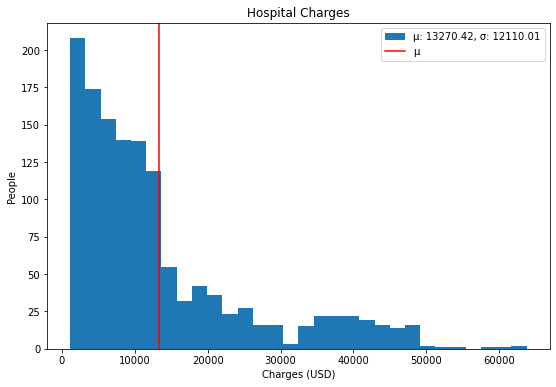

In [4]:
#Compute meand and std on medical charges
mc_mean = np.mean(medical.charges)
mc_std = np.std(medical.charges, ddof=1)
mc_n = len(medical.charges)
#Plotting histogram
fig, ax = plt.subplots(figsize=(9,6))
_ = plt.hist(medical.charges, bins=30, label='μ: {}, σ: {}'.format('%.2f'%mc_mean, '%.2f'%mc_std))
_ = plt.axvline(mc_mean, color='r', label='μ')
_ = plt.xlabel('Charges (USD)')
_ = plt.ylabel('People')
_ = plt.title('Hospital Charges')
_ = ax.legend()
plt.show()

**We see from the histogram that the data is quite skewed to the right, so the mean and standard deviation are not extremelly helpful or informative since the distribution is not normal and cannot be summarized by only those two statistics. They help in the sense that they give us the central tendency and the spread of the distribution.**

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

**Given that the data represents a random sample, and given that we 1,338 observations (large sample), the requirement of randomness and size is fullfilled. Therefore, the most appropriate frequentist test could be a _t_ statistic to validate the average charge drop.**

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

**The nature of the problem relies on charges getting lower 12K, therefore, we can compute a one-sided interval. Since going beyond 12K in charges won't do any harm to the business model of the hospital.**

**We will be using the following reasoning to compute the Upper One-Sided Confidence Interval:**

\begin{equation}
UI = [μ – t_(α, n-1)*(\frac{σ}{\sqrt{n}}), ∞ ]
\end{equation}


In [5]:
#Compute t value for the upper limit with a 95% confidence level and n-1 degrees of freedom: 
#https://www.statology.org/one-sided-confidence-interval/
mc_t = t.ppf(0.95, df=mc_n-1)
#Comput UI
mc_ui = mc_mean - mc_t * (mc_std / np.sqrt(mc_n))
mc_ui

12725.48718381623

**Based on this result:**

\begin{equation}
UI = [12725.49 , ∞ ]
\end{equation}

**We can say that we are 95% confident that the true medical charges mean is equal or greater than $12,725.49. Thus, eventhough we are not at the critical point of 12,000 yet, we are fairly close to it. So there is no need to worry at this point, but maybe follow-up actions are worth it.**

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Null Hypothesis (Ho):__ Patients with insurance are charged equally with the ones without.

__Alt Hypothesis (H1):__ Having insurance determines the amount a patient is charged.

__Assumptions:__ 

Since we are computing a two-sample (unpaired or independent) t-test to determine whether the charges between two independent groups (insurance and no insurance) are equal (Ho) or significantly different (H1). Our [assumptions](https://www.reneshbedre.com/blog/ttest.html) are:

1. Observations in two groups have an approximately normal distribution
2. ___Homogeneity of variances (variances are equal between treatment groups)___
3. The two groups are sampled independently from each other from the same population

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [8]:
#With insurance population
mc_i = medical.query('insuranceclaim == 1').charges
mc_i_mean = np.mean(mc_i)
mc_i_std = np.std(mc_i, ddof=1)
mc_i_n = len(mc_i)

#No insurance population
mc_ni = medical.query('insuranceclaim == 0').charges
mc_ni_mean = np.mean(mc_ni)
mc_ni_std = np.std(mc_ni, ddof=1)
mc_ni_n = len(mc_ni)

In [9]:
#Compute pool standard deviation of the two groups
mc_sp = np.sqrt(((mc_i_n - 1) * mc_i_std**2 + (mc_ni_n - 1) * mc_ni_std**2) / (mc_i_n + mc_ni_n - 2))
#Compute t-test statistic
mc_ts = (mc_i_mean - mc_ni_mean) / (mc_sp * np.sqrt((1/mc_i_n) + (1/mc_ni_n)))
mc_ts

11.89329903087671

In [10]:
#Now we compute the p-value based on the t statistic: https://www.statology.org/t-score-p-value-calculator/
#https://www.statology.org/p-value-from-t-score-python/
mc_pv = t.sf(mc_ts, df=mc_n-1) * 2
mc_pv

4.45016623302336e-31

In [11]:
print("Manual Computation: [t = {}, p_0.05 = {}]".format('%.4f'%mc_ts, mc_pv))

Manual Computation: [t = 11.8933, p_0.05 = 4.45016623302336e-31]


**Now we compute the two statistics using scipy modules:**

In [12]:
#We can assume that the variance is not that different by computing the ratio
np.var(mc_i) / np.var(mc_ni)

4.749848662765994

In [13]:
#Independent sample test with scipy stats: https://www.statology.org/two-sample-t-test-python/
mc_ts_sp = ttest_ind(mc_i, mc_ni, equal_var=True)
mc_ts_sp

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [15]:
print("Computation Using Scipy: [t = {}, p_0.05 = {}]".format('%.4f'%mc_ts_sp[0], mc_ts_sp[1]))

Computation Using Scipy: [t = 11.8933, p_0.05 = 4.461230231620717e-31]


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

**At the documentation, there is one method called ztest from statsmodels.stats.weightstats that can serve form making a one sample Z-test using python**

In [63]:
from statsmodels.stats.weightstats import ztest as ztest
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test